____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos__<br/>
__Elaborado por: Francisco Lavaggi y Luciano De Doménico__<br/>
____

# Data Science- Predicción deserción de clientes Telco (EDA)


En el presente trabajo práctico, se realizará:

- Un __análisis exploratorio de datos__ (EDA)
- Conclusiones del análisis



## 1. Análisis Exploratorio de Datos

Empezaremos cargando los datos desde la unidad de Google Drive y posteriormente desarrollaremos el EDA.

In [119]:
# Cargamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import warnings
warnings.filterwarnings('ignore')

url = "https://drive.google.com/uc?id=1Ooq9xb7_WQgX3U2AiKaelJphagUB52ZY" #Cargamos la url con el dataset de análisis
gdown.download(url, "telco_churn_clusterai.csv", quiet=False) # Usamos gdown para dercargarlo y cargarlo en un dataframe
df = pd.read_csv("telco_churn_clusterai.csv", index_col= 1) # Leemos el dataframe con pandas y ponemos de índice a Client_ID

Downloading...
From: https://drive.google.com/uc?id=1Ooq9xb7_WQgX3U2AiKaelJphagUB52ZY
To: /content/telco_churn_clusterai.csv
100%|██████████| 958k/958k [00:00<00:00, 106MB/s]


Analizamos la forma que tiene nuestro dataset: Columnas, finasl, nombres, características.

In [120]:
df.head() # Vemos cantidad de filas y de columnas
print(f'Filas: {np.shape(df)[0]}')
print(f'Columnas: {np.shape(df)[1]}')

# Obervamos el nombre de las columnas del dataset
print(f'\nNombre de las columnas: \n{df.columns.values}')

Filas: 7043
Columnas: 21

Nombre de las columnas: 
['Unnamed: 0' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


Observamos que hay 7043 clientes y 21 features asociadas a cada cliente.

Analizamos los tipos de datos que tiene el dataset

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            6127 non-null   object 
 2   SeniorCitizen     6127 non-null   float64
 3   Partner           6127 non-null   object 
 4   Dependents        6127 non-null   object 
 5   tenure            6127 non-null   float64
 6   PhoneService      6127 non-null   object 
 7   MultipleLines     6127 non-null   object 
 8   InternetService   6127 non-null   object 
 9   OnlineSecurity    6127 non-null   object 
 10  OnlineBackup      6127 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          5846 non-null   object 
 16  PaperlessBilling  5846 non-null 

In [122]:
#Se imprimen las primeras 5 filas del dataset
df.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,Female,NaN,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
5575-GNVDE,1,Male,0.0,No,No,34.0,Yes,No,NaN,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
3668-QPYBK,2,Male,0.0,No,No,2.0,NaN,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,3,Male,0.0,No,No,NaN,No,NaN,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,4,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


Podemos ver que hay columnas que no son necesarias: Unnamed y CustomerID, y que la columna TotalCharges está siendo procesada como un objeto y como un float. Además, la feature SeniorCitizen está con 0 y 1 a diferencia del resto que está como Yes/No. Procedemos a arreglarlo. Eliminaremos Unnamed y usaremos CustomerID como índice

In [123]:
#Eliminamos la columna Unamed
df.drop('Unnamed: 0', axis=1, inplace=True)

# Modificamos el tipo de dato de 'TotalCharges' de object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = np.where(
    df['SeniorCitizen'] == 1, 'Yes',
    np.where(df['SeniorCitizen'] == 0, 'No', np.nan)
)
df['SeniorCitizen'] = df['SeniorCitizen'].replace('nan', np.nan)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34.0,Yes,No,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,NaN,1889.50,No
3668-QPYBK,Male,No,No,No,2.0,NaN,No,NaN,Yes,NaN,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,NaN,No,NaN,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [124]:
#Analizamos estadísticamente los valores de los features numéricos
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,6127.000000,5846.000000,7032.000000
mean,32.539742,64.658655,2283.300441
std,24.629822,30.046041,2266.771362
min,0.000000,18.700000,18.800000
25%,9.000000,35.400000,401.450000
50%,29.000000,70.375000,1397.475000
75%,56.000000,89.687500,3794.737500
max,72.000000,118.750000,8684.800000


In [125]:
#Analizamos el contenido de las variables categóricas
df.describe(include=['object'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,6127,6127,6127,6127,6127,6127,6127,6127,6127,7043,7043,7043,7043,5846,5846,5846,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3082,5137,3172,4294,5527,2954,2683,3012,2669,3095,3473,2810,2785,3218,3476,2001,5174


### 1.1 __Limpieza de datos__

En esta sección, vamos a identificar valores nulos, duplicados y simbolos que puedan estar ensuciado nuestra información

In [126]:
#Quitamos duplicados
print("Cantidad de filas antes de duplicados:", df.shape[0])

df.drop_duplicates(inplace=True, keep='first')
print("Cantidad de filas después de quitar duplicados:", df.shape[0])

Cantidad de filas antes de duplicados: 7043
Cantidad de filas después de quitar duplicados: 7043


In [127]:
#Buscamos nulos en las features
col_NaN = df.isnull().any()
print(col_NaN,'\r\n')

gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges       True
TotalCharges         True
Churn               False
dtype: bool 



In [128]:
#Obtenemos la cantidad de valores nulos ordenados de mayor a menor y porcentualmente respecto a la cantidad de muestras
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PaperlessBilling,1197,16.995598
MonthlyCharges,1197,16.995598
PaymentMethod,1197,16.995598
Contract,1197,16.995598
gender,916,13.005821
Partner,916,13.005821
Dependents,916,13.005821
tenure,916,13.005821
PhoneService,916,13.005821
MultipleLines,916,13.005821


Decidimos reemplazar los valores NaN por la MODA (valor más frecuente) en los casos donde la variable es categórica y por la media en los casos donde la variable es numérica.


In [137]:
#Rellenamos con la media los valores numéricos nulos
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

#Rellenamos con la moda los valores categóricos nulos
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Valores nulos después de reemplazar:")
print(df.isnull().sum())

df.head()

Valores nulos después de reemplazar:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
5575-GNVDE,Male,No,No,No,34.000000,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,No,Mailed check,64.658655,1889.50,No
3668-QPYBK,Male,No,No,No,2.000000,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
7795-CFOCW,Male,No,No,No,32.539742,No,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
9237-HQITU,Female,No,No,No,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,64.658655,151.65,Yes


### Analizamos valores únicos en variables categóricas para detectar valores erroneos

Corroboramos la existencia de alguna muestra con errores de tipeo, con símbolos o alguna irregularidad

In [138]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

gender:
gender
Male      3998
Female    3045
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
No     6053
Yes     990
Name: count, dtype: int64

Partner:
Partner
No     4088
Yes    2955
Name: count, dtype: int64

Dependents:
Dependents
No     5210
Yes    1833
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6443
No      600
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3870
Yes                 2579
No phone service     594
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3599
DSL            2101
No             1343
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3928
Yes                    1783
No internet service    1332
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No                     3585
Yes                    2110
No internet service    1348
Name: count, dtype: int64

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No int

Afortunadamente, no es el caso, por lo que podemos continuar el análisis sin hacer estas modificaciones.

### 1.2. __Análisis de distribuciones__

Observamos como se distribuyen nuestras features con un histograma.


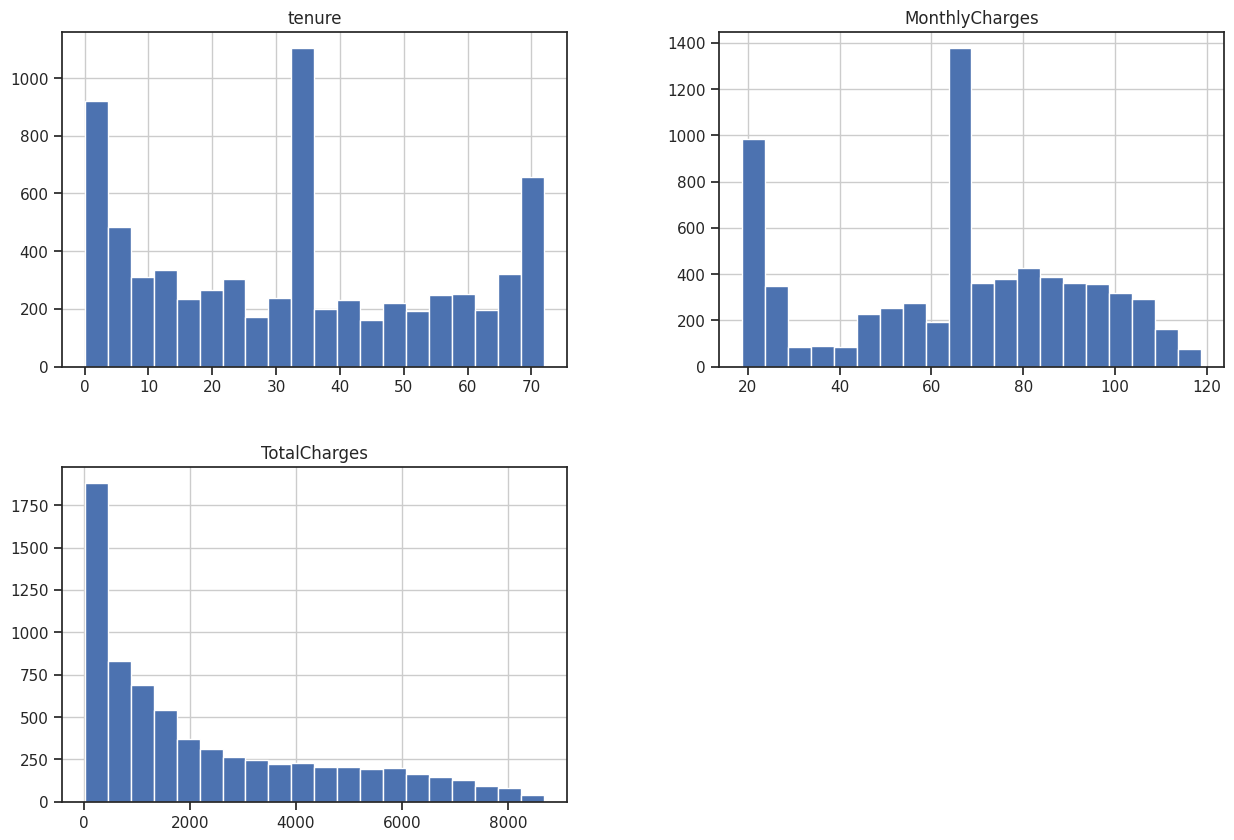

In [140]:
# Distribuciones de variables numéricas
df.hist(bins=20, figsize=(15,10))
plt.show()

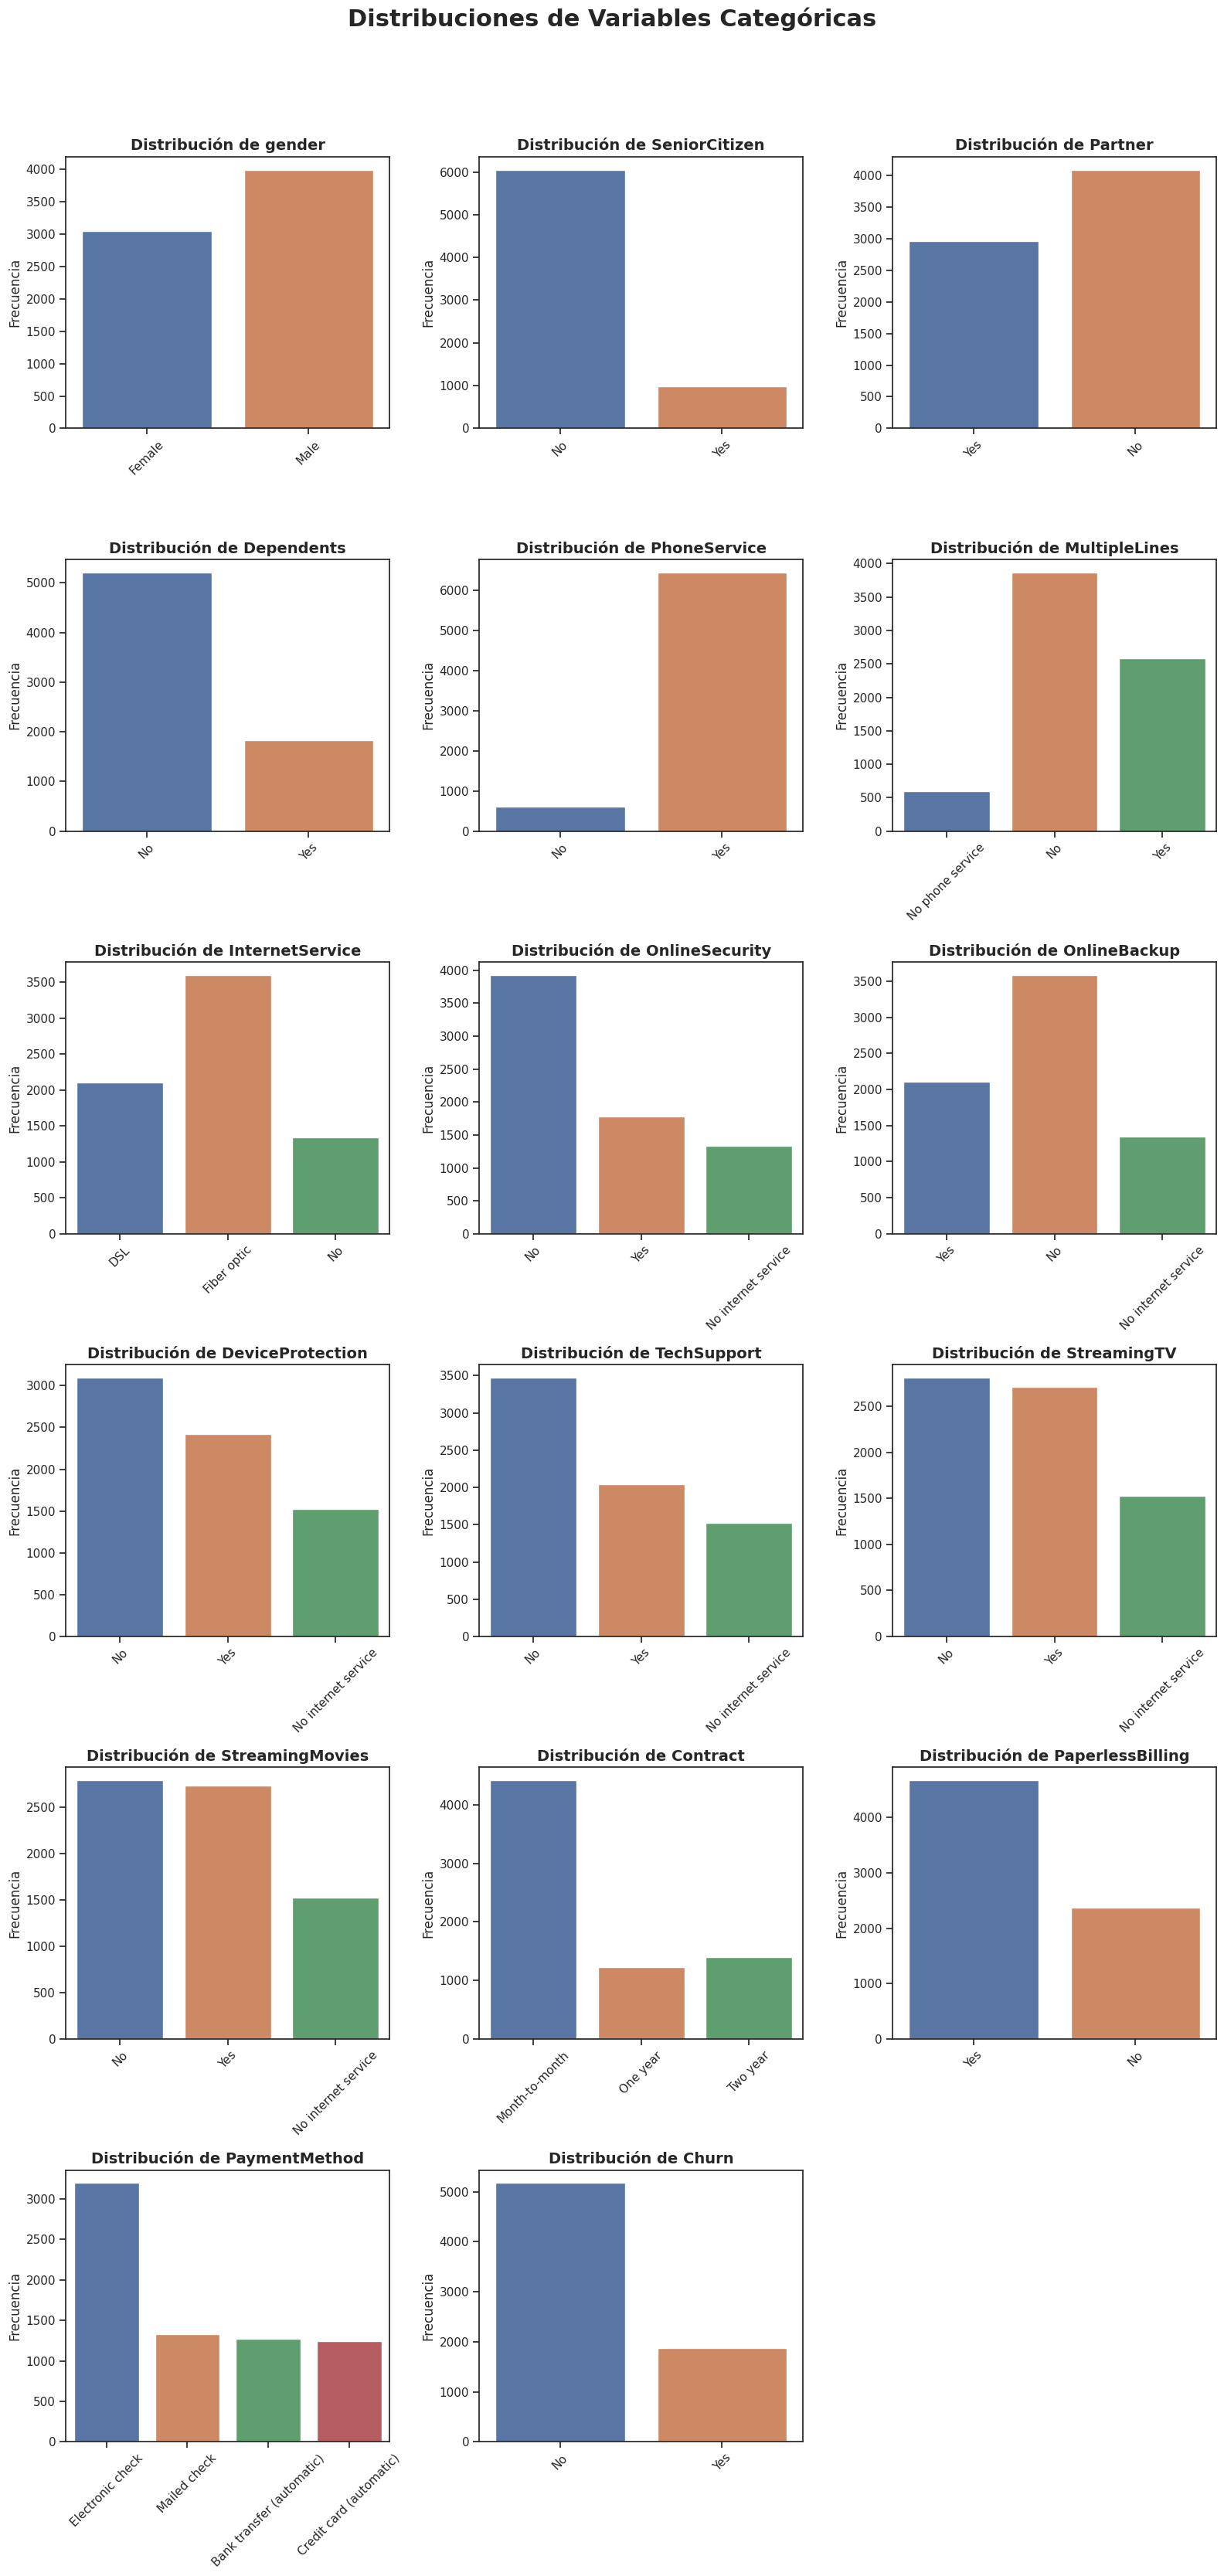

In [147]:
# Seleccionamos sólo las columnas categóricas, excluyendo customerID y TotalCharges
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col not in ['customerID', 'TotalCharges']]
cat_features = len(cat_cols)

# Definimos el tamaño de la cuadrícula
fig, axes = plt.subplots(nrows=(cat_features // 3) + 1, ncols=3, figsize=(16, cat_features * 2))
fig.suptitle("Distribuciones de Variables Categóricas", fontsize=22, fontweight='bold')

# Ajustamos la paleta de colores
palette = sns.color_palette("deep")

# Recorremos cada columna categórica y creamos un gráfico de barras
for i, col in enumerate(cat_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=df, x=col, ax=ax, palette=palette)
    ax.set_title(f"Distribución de {col}", fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_xlabel("")  # Quitamos etiquetas de x innecesarias

# Eliminamos ejes vacíos si hay menos gráficos que celdas en la cuadrícula
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Ajustamos los espacios entre gráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 1.3. __Análisis de correlación__

Realizaremos una matriz de correlación entre las features para encontrar alguna relación lineal

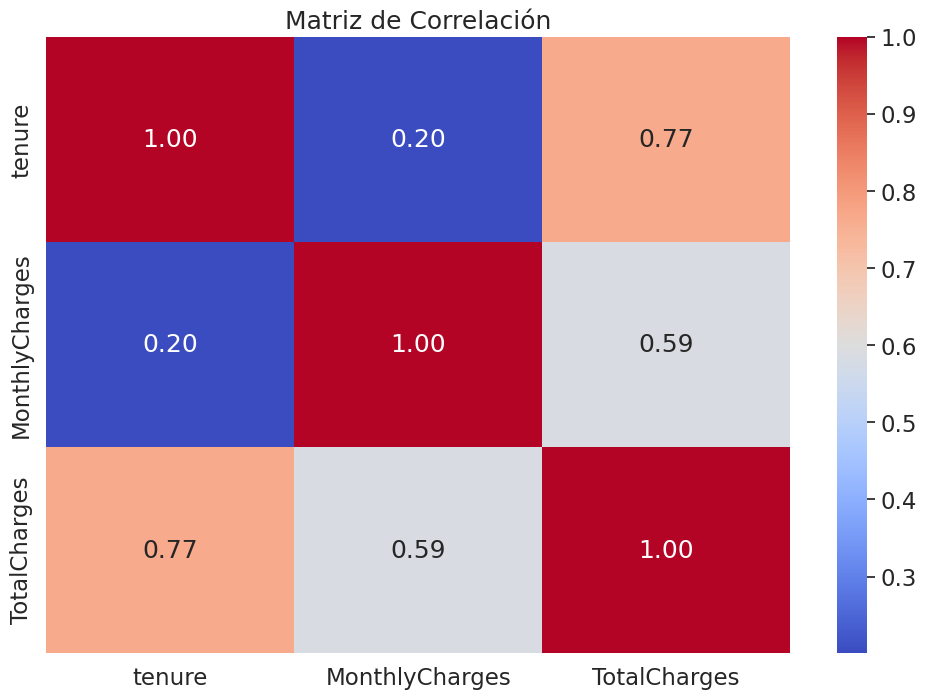

In [133]:
# Matriz de correlación
# Seleccionamos solo las columnas numéricas, ya que la matriz de correlación solo funciona en columnas con este tipo de dato.
df_numeric = df.select_dtypes(include=['number'])

# Calculamos la matriz de correlación solo para las columnas numéricas
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Obervamos que la única correlación fuerte está en la varaible TotalCharges y tenure. Además, hay una leve linealidad entre la variable Tenure, SeniorCitizen y MonthlyCharges

#### 1.4 __Analisis de outliers__
Observamos si hay outliers en nuestro dataset:

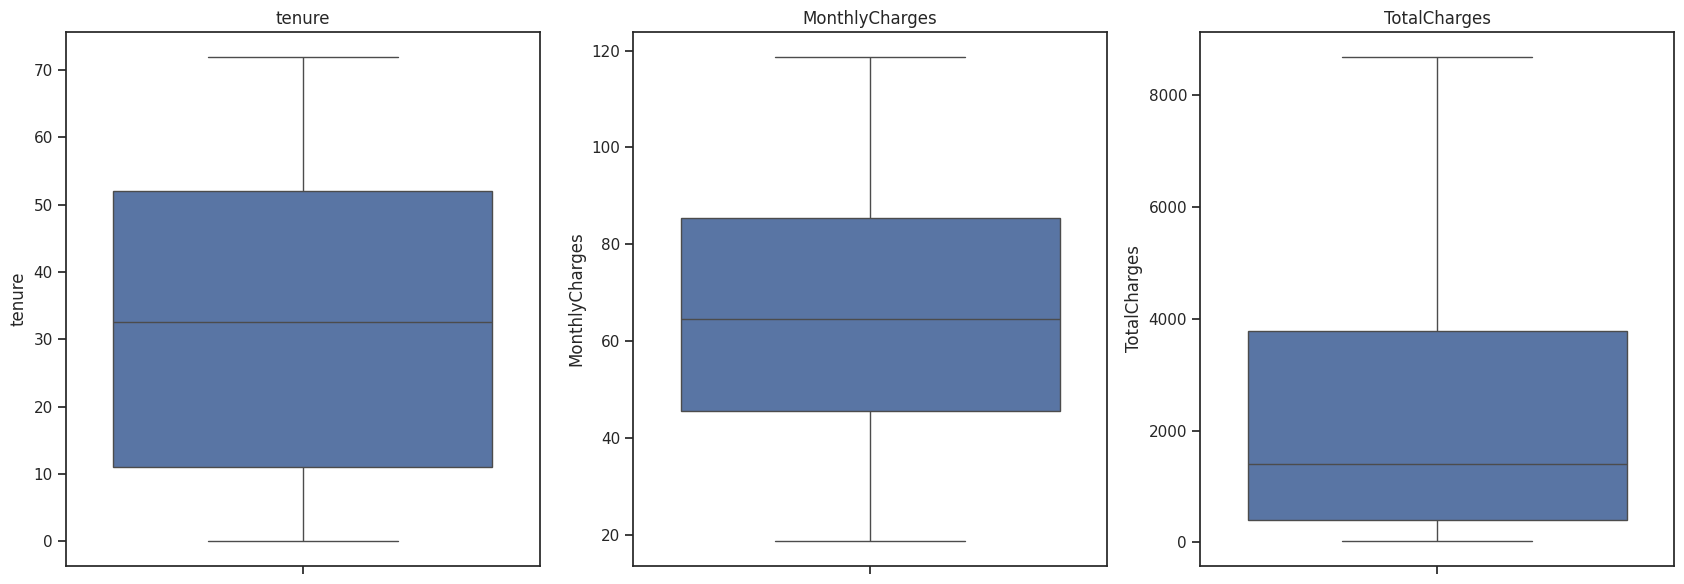

In [148]:
#Generamos un gráfico de BoxPlot para cada feature numérica

# Seleccionamos solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Definimos el número de gráficos y la cantidad de columnas para la cuadrícula
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(17, 6))

# Recorremos las columnas numéricas y creamos un boxplot en cada subgráfico
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Si bien el BoxPlot no arroja valores por fuera del rango intercuartílico, obervamos que la media de TotalCharges se encuentra desplazada y existe un desbalanceo de altos cargos.

### 1.5 __Análisis de la variable objetivo__

Como en la siguiente sección desarrollaremos un modelo de ML centrado en la variable Churn, procedemos a ver como se comporta respecto a otras variables.

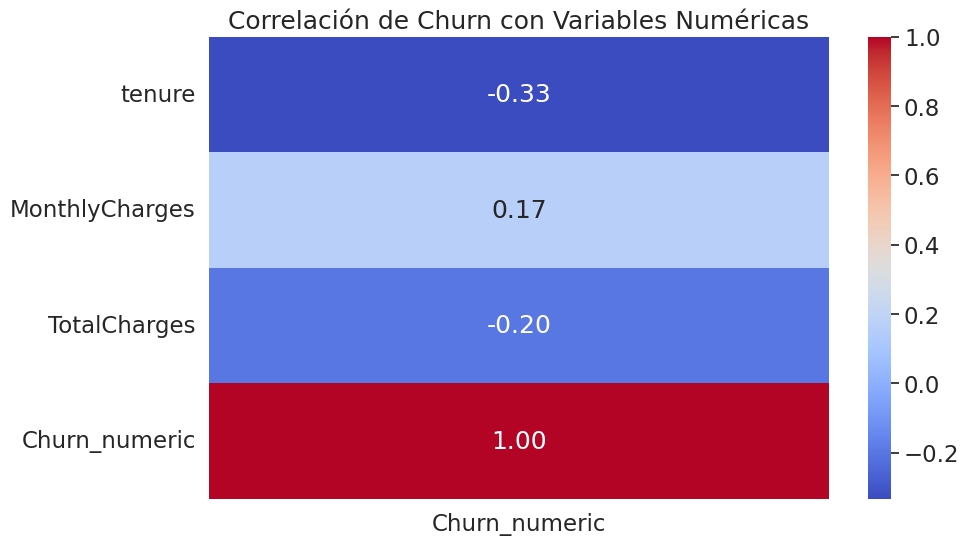

In [135]:
# Procedemos a convertir a la variable Churn en una numérica y averiguar su correlación con el resto de variables numéricas del dataset.

# Convertir Churn a valores numéricos (0 y 1)
df_churn = df.copy()
df_churn['Churn_numeric'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})
numeric_cols = df_churn.select_dtypes(include=['number']).columns

# Calculamos la correlación entre Churn y las demás variables numéricas
corr = df_churn[numeric_cols].corr()

# Visualizamos la correlación de Churn con las otras variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Churn_numeric']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlación de Churn con Variables Numéricas")
plt.show()

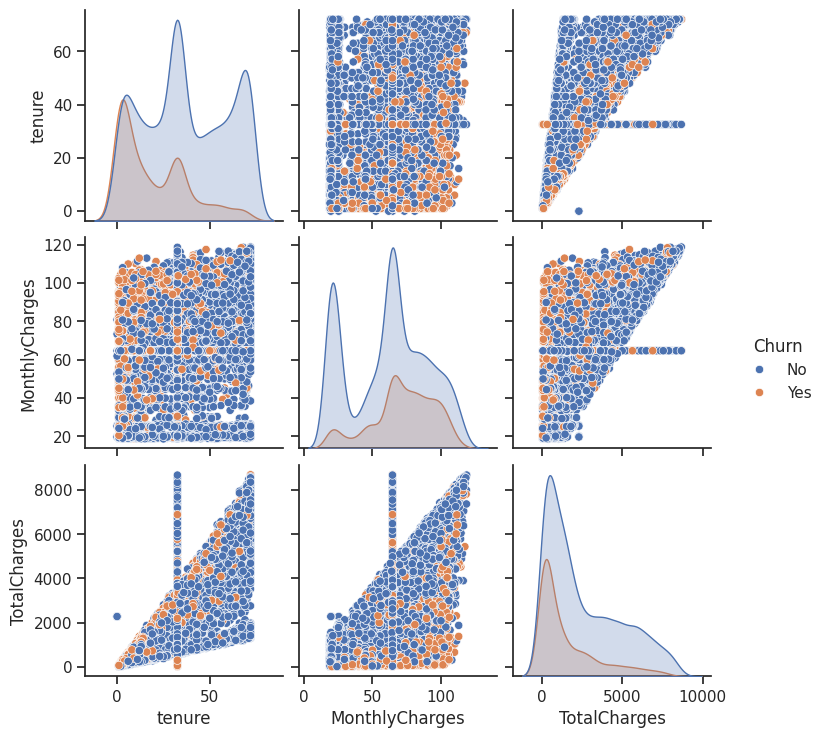

In [149]:
# Selección de columnas numéricas y la variable Churn
df_clean = df.dropna(subset=['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'])
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_numerical = df_clean[numerical_columns + ['Churn']]

# Graficamos pairplot
sns.set(style="ticks")
pairplot = sns.pairplot(df_numerical , hue='Churn', diag_kind='kde', corner=False)
plt.show()

### 2. __Conclusiones preeliminares__ del EDA

A partir de este análisis, podemos desarrollar algunas hipótesis de por qué los clientes pueden irse.
A partir del análisis de distribución y correlación podemos intuir que los TotalCharges, los MonthyCharges y la antiguedad del cliente pueden tener un peso significativo en esta decisión.


